In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
n_measurements = 10

hist_distances = np.zeros((n_measurements, 10))

for i in range(n_measurements):
    for r_i, r in enumerate(np.arange(0.1, 1.01, 0.1)):
        data = pd.read_csv(f'seperate_{i}/rate_{round(r, 1)}.csv')
        data_in_range = data[(data['time'] > 20) & (data['x'] > 5) & (data['x'] < 25) & (data['y'] > 0) & (data['y'] < 5)]

        group_0 = data_in_range[data_in_range['group_id'] == 0]['y']
        group_1 = data_in_range[data_in_range['group_id'] == 1]['y']

        hist_0, _ = np.histogram(group_0, density=True, bins=10, range=(0.1, 4.9))
        hist_1, _ = np.histogram(group_1, density=True, bins=10, range=(0.1, 4.9))

        hist_distances[i, r_i] = np.abs(hist_0-hist_1).sum()

#         group_0.hist(density=True, alpha=0.5)
#         group_1.hist(density=True, alpha=0.5)
#         plt.show()

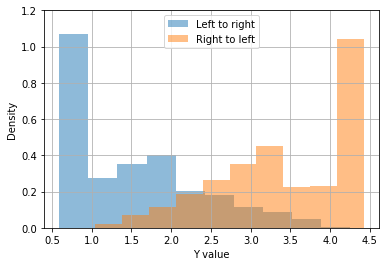

In [49]:
data = pd.read_csv(f'seperate_0/rate_1.0.csv')
data_in_range = data[(data['time'] > 20) & (data['x'] > 5) & (data['x'] < 25) & (data['y'] > 0) & (data['y'] < 5)]
group_0 = data_in_range[data_in_range['group_id'] == 0]['y']
group_1 = data_in_range[data_in_range['group_id'] == 1]['y']
group_0.hist(density=True, alpha=0.5, label='Left to right')
group_1.hist(density=True, alpha=0.5, label='Right to left')
plt.xlabel('Y value')
plt.ylabel('Density')
plt.legend(loc='upper center')
plt.ylim((0, 1.2))
plt.savefig('plots/s_hist_small_diff.png', dpi=150)
plt.show()

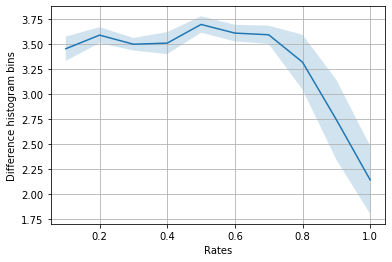

In [43]:
mean = hist_distances.mean(axis=0)
std = hist_distances.std(axis=0) / np.sqrt(n_measurements)
plt.plot(np.arange(0.1, 1.01, 0.1), mean)
plt.fill_between(np.arange(0.1, 1.01, 0.1), mean - std, mean + std, alpha=0.2)
plt.ylabel('Difference histogram bins')
plt.xlabel('Rates')
plt.grid()
plt.savefig('plots/s_diff_hists.png', dpi=150)
plt.show()

In [12]:
hist_distances

array([[1.55977847, 2.04674879, 2.61069128, 1.85900599, 1.90585047,
        1.80277737, 2.66106528, 0.60737244, 0.9054025 , 0.47840717],
       [2.27321833, 2.33565995, 1.99016235, 1.86356805, 0.64668905,
        1.88980024, 0.89192835, 1.23168498, 1.20012965, 0.85918606],
       [1.13241869, 1.85020837, 1.92187461, 1.62167102, 2.43265098,
        1.00627575, 1.41663504, 0.81031209, 1.05355297, 0.99750081],
       [1.4802717 , 1.48123007, 2.63482314, 2.20671696, 2.56966941,
        1.0523686 , 1.88827326, 0.74919067, 0.74524887, 0.4783145 ],
       [1.36517588, 1.54973115, 2.17904769, 1.60455191, 1.88777997,
        0.36859153, 0.78519875, 1.75421482, 0.93050245, 1.01756348],
       [1.77305642, 2.44472601, 1.61444893, 3.44755437, 2.5995696 ,
        1.00265189, 1.76661825, 1.07609705, 1.49267778, 0.66767391],
       [2.95187462, 0.97581014, 1.88141118, 1.67989857, 2.77366278,
        1.53076516, 0.79456358, 0.95446858, 1.02480361, 0.58964247]])